In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## 3.8.3 Gram-Schmidt Orthogonalization

Projections are at the core of the Gram-Schmidt method that allows us to constructively transform any basis $ (b_1, \ldots, b_n) $ of an $ n $-dimensional vector space $ V $ into an orthogonal/orthonormal basis $ (u_1, \ldots, u_n) $ of $ V $. This basis always exists (Liesen and Mehrmann, 2015) and $ \text{span}[b_1, \ldots, b_n] = \text{span}[u_1, \ldots, u_n] $.

The Gram-Schmidt orthogonalization method iteratively constructs an orthogonal basis $ (u_1, \ldots, u_n) $ from any basis $ (b_1, \ldots, b_n) $ of $ V $ as follows:

$$
u_1 := b_1, \tag{3.67}
$$

$$
u_k := b_k - \pi_{\text{span}[u_1, \ldots, u_{k-1}]} (b_k), \quad k = 2, \ldots, n. \tag{3.68}
$$

In (3.68), the $ k $-th basis vector $ b_k $ is projected onto the subspace spanned by the first $ k-1 $ constructed orthogonal vectors $ u_1, \ldots, u_{k-1} $; see Section 3.8.2. This projection is then subtracted from $ b_k $ and yields a vector $ u_k $ that is orthogonal to the $ (k-1) $-dimensional subspace spanned by $ u_1, \ldots, u_{k-1} $. Repeating this procedure for all $ n $ basis vectors $ b_1, \ldots, b_n $ yields an orthogonal basis $ (u_1, \ldots, u_n) $ of $ V $. If we normalize the $ u_k $, we obtain an ONB where $ \|u_k\| = 1 $ for $ k = 1, \ldots, n $.

### Example  (Gram-Schmidt Orthogonalization)

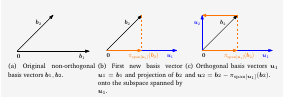

**Fig.12** Gram-Schmidt orthogonalization.

(a) Non-orthogonal basis $ (b_1, b_2) $ of $ \mathbb{R}^2 $.

(b) First constructed basis vector $ u_1 $ and projection of $ b_2 $ onto $ \text{span}[u_1] $.

(c) Orthogonal basis $ (u_1, u_2) $ of $ \mathbb{R}^2 $.

Consider a basis $ (b_1, b_2) $ of $ \mathbb{R}^2 $, where

$$
b_1 = \begin{bmatrix} 2 \\ 0 \end{bmatrix}, \quad b_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}; \tag{3.69}
$$

see also Figure 3.12(a). Using the Gram-Schmidt method, we construct an orthogonal basis $ (u_1, u_2) $ of $ \mathbb{R}^2 $ as follows (assuming the dot product as the inner product):

$$
u_1 := b_1 = \begin{bmatrix} 2 \\ 0 \end{bmatrix}, \tag{3.70}
$$

$$
u_2 := b_2 - \pi_{\text{span}[u_1]} (b_2) \stackrel{(3.45)}{=} b_2 - \frac{u_1 u_1^\top}{\|u_1\|^2} b_2 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} - \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}. \tag{3.71}
$$

In [1]:
import math

# --- Dot Product ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm of a Vector ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Project a Vector onto a Subspace Spanned by Orthonormal Vectors ---
def project_onto_subspace(v, subspace_basis):
    """
    Project vector v onto the subspace spanned by the orthonormal basis vectors.
    Assumes subspace_basis is already orthonormal.
    Projection = sum(<v, ui> ui) over all ui in subspace_basis.
    """
    projection = [0.0] * len(v)
    for u in subspace_basis:
        coeff = dot_product(v, u)
        projection = [p + coeff * ui for p, ui in zip(projection, u)]
    return projection

# --- Gram-Schmidt Orthogonalization (Equations 3.67–3.68) ---
def gram_schmidt(basis, normalize=True):
    """
    Apply the Gram-Schmidt process to transform the basis into an orthogonal basis.
    If normalize=True, returns an orthonormal basis (||uk|| = 1).
    """
    if not basis:
        return []
    
    orthogonal_basis = []
    
    # Step 1: u1 = b1 (Equation 3.67)
    u1 = basis[0][:]  # Copy to avoid modifying the original
    if normalize:
        norm_u1 = norm(u1)
        if norm_u1 < 1e-10:
            raise ValueError("First basis vector cannot be zero")
        u1 = [ui / norm_u1 for ui in u1]
    orthogonal_basis.append(u1)
    
    # Step 2: For k = 2 to n, uk = bk - pi_span[u1,...,uk-1](bk) (Equation 3.68)
    for k in range(1, len(basis)):
        bk = basis[k][:]
        # Project bk onto the subspace spanned by u1, ..., uk-1
        projection = project_onto_subspace(bk, orthogonal_basis)
        # Subtract the projection to get uk
        uk = [bki - pi for bki, pi in zip(bk, projection)]
        
        # Check if uk is zero (linearly dependent)
        norm_uk = norm(uk)
        if norm_uk < 1e-10:
            raise ValueError(f"Basis vector {bk} is linearly dependent")
        
        # Normalize if requested
        if normalize:
            uk = [uki / norm_uk for uki in uk]
        
        orthogonal_basis.append(uk)
    
    return orthogonal_basis

# --- Run the Implementation ---
# Example 3.12: Gram-Schmidt Orthogonalization in R^2
print("Example 3.12: Gram-Schmidt Orthogonalization")
b1 = [2.0, 0.0]
b2 = [1.0, 1.0]
basis = [b1, b2]
print(f"Original basis: b1 = {b1}, b2 = {b2}")

# Apply Gram-Schmidt (orthonormal basis)
orthonormal_basis = gram_schmidt(basis, normalize=True)
print("\nOrthonormal basis (normalized):")
print(f"u1 = {[round(u, 3) for u in orthonormal_basis[0]]} (should match b1 normalized)")
print(f"u2 = {[round(u, 3) for u in orthonormal_basis[1]]}")

# Apply Gram-Schmidt (orthogonal basis, not normalized)
orthogonal_basis = gram_schmidt(basis, normalize=False)
print("\nOrthogonal basis (not normalized):")
print(f"u1 = {[round(u, 3) for u in orthogonal_basis[0]]} (Equation 3.70)")
print(f"u2 = {[round(u, 3) for u in orthogonal_basis[1]]} (Equation 3.71)")

# Verify orthogonality
dot_u1_u2 = dot_product(orthogonal_basis[0], orthogonal_basis[1])
print(f"\nDot product <u1, u2> = {dot_u1_u2:.3f} (should be 0 for orthogonality)")

# Verify spans are the same (by checking if b1, b2 can be expressed as linear combinations of u1, u2)
# For simplicity, check if projection of b2 onto span[u1, u2] equals b2
proj_b2 = project_onto_subspace(b2, orthonormal_basis)
print(f"\nProjection of b2 onto span[u1, u2] = {[round(p, 3) for p in proj_b2]}")
print(f"Matches b2: {all(abs(p - b) < 1e-10 for p, b in zip(proj_b2, b2))}")

Example 3.12: Gram-Schmidt Orthogonalization
Original basis: b1 = [2.0, 0.0], b2 = [1.0, 1.0]

Orthonormal basis (normalized):
u1 = [1.0, 0.0] (should match b1 normalized)
u2 = [0.0, 1.0]

Orthogonal basis (not normalized):
u1 = [2.0, 0.0] (Equation 3.70)
u2 = [-3.0, 1.0] (Equation 3.71)

Dot product <u1, u2> = -6.000 (should be 0 for orthogonality)

Projection of b2 onto span[u1, u2] = [1.0, 1.0]
Matches b2: True


## Projection onto Affine Subspaces

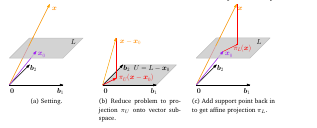

**Fig.13** Projection onto an affine space.

(a) Original setting.

(b) Setting shifted by $ -x_0 $ so that $ x - x_0 $ can be projected onto the direction space $ U $.

(c) Projection is translated back to $ x_0 + \pi_U(x - x_0) $, which gives the final orthogonal projection $ \pi_L(x) $.

These steps are illustrated in Figures 3.13(b) and (c). We immediately see that $ u_1 $ and $ u_2 $ are orthogonal, i.e., $ u_1^\top u_2 = 0 $.

Thus far, we discussed how to project a vector onto a lower-dimensional subspace $ U $. In the following, we provide a solution to projecting a vector onto an affine subspace. Consider the setting in Figure 3.13(a). We are given an affine space $ L = x_0 + U $, where $ b_1, b_2 $ are basis vectors of $ U $.

To determine the orthogonal projection $ \pi_L(x) $ of $ x $ onto $ L $, we transform the problem into a problem that we know how to solve: the projection onto a vector subspace. In order to get there, we subtract the support point $ x_0 $ from $ x $ and from $ L $, so that $ L - x_0 = U $ is exactly the vector subspace $ U $. We can now use the orthogonal projections onto a subspace we discussed in Section 3.8.2 and obtain the projection $ \pi_U(x - x_0) $, which is illustrated in Figure 3.13(b). This projection can now be translated back into $ L $ by adding $ x_0 $, such that we obtain the orthogonal projection onto an affine space $ L $ as

$$
\pi_L(x) = x_0 + \pi_U(x - x_0), \tag{3.72}
$$

where $ \pi_U(\cdot) $ is the orthogonal projection onto the subspace $ U $, i.e., the direction space of $ L $; see Figure 3.13(c).

From Figure 3.13, it is also evident that the distance of $ x $ from the affine space $ L $ is identical to the distance of $ x - x_0 $ from $ U $, i.e.,

$$
d(x, L) = \| x - \pi_L(x) \| = \| x - (x_0 + \pi_U(x - x_0)) \| \tag{3.73a}
$$

$$
= d(x - x_0, \pi_U(x - x_0)) = d(x - x_0, U). \tag{3.73b}
$$

We will use projections onto an affine subspace to derive the concept of a separating hyperplane in Section 12.1.

In [2]:
import math

# --- Dot Product ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm of a Vector ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (n x m) by vector x (m x 1). Returns a vector.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Matrix-Matrix Multiplication ---
def matrix_multiply(A, B):
    """
    Multiply matrices A (n x m) and B (m x p). Returns an (n x p) matrix.
    """
    n, m = len(A), len(A[0])
    p = len(B[0])
    result = [[0.0 for _ in range(p)] for _ in range(n)]
    for i in range(n):
        for j in range(p):
            result[i][j] = sum(A[i][k] * B[k][j] for k in range(m))
    return result

# --- Transpose of a Matrix ---
def transpose(A):
    """
    Compute the transpose of matrix A.
    """
    n, m = len(A), len(A[0])
    return [[A[j][i] for j in range(n)] for i in range(m)]

# --- Inverse of a 2x2 Matrix ---
def inverse_2x2(A):
    """
    Compute the inverse of a 2x2 matrix using the determinant formula.
    """
    if len(A) != 2 or len(A[0]) != 2:
        raise ValueError("Matrix must be 2x2")
    
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    if abs(det) < 1e-10:
        raise ValueError("Matrix is not invertible")
    
    adj = [[A[1][1], -A[0][1]], [-A[1][0], A[0][0]]]
    return [[adj[i][j] / det for j in range(2)] for i in range(2)]

# --- Projection onto a Subspace U ---
def project_onto_subspace(x, B):
    """
    Project vector x onto the subspace U spanned by the columns of B.
    Returns pi_U(x).
    """
    Bt = transpose(B)
    BtB = matrix_multiply(Bt, B)
    Btx = matrix_vector_multiply(Bt, x)
    
    if len(BtB) > 2:
        raise ValueError("This implementation only supports m <= 2 for simplicity")
    BtB_inv = inverse_2x2(BtB)
    
    lambda_coeffs = matrix_vector_multiply(BtB_inv, Btx)
    pi_U_x = matrix_vector_multiply(B, lambda_coeffs)
    return pi_U_x

# --- Projection onto an Affine Subspace (Equation 3.72) ---
def project_onto_affine_subspace(x, x0, B):
    """
    Project vector x onto the affine subspace L = x0 + U, where U is spanned by the columns of B.
    Equation 3.72: pi_L(x) = x0 + pi_U(x - x0)
    """
    # Step 1: Compute x - x0
    x_minus_x0 = [xi - x0i for xi, x0i in zip(x, x0)]
    
    # Step 2: Project x - x0 onto U
    pi_U_x_minus_x0 = project_onto_subspace(x_minus_x0, B)
    
    # Step 3: Compute pi_L(x) = x0 + pi_U(x - x0)
    pi_L_x = [x0i + pi for x0i, pi in zip(x0, pi_U_x_minus_x0)]
    return pi_L_x, x_minus_x0, pi_U_x_minus_x0

# --- Run the Implementation ---
# Example: Project a vector in R^3 onto an affine subspace L = x0 + U
print("Projection onto an Affine Subspace (Section 3.8.4):")
x = [1.0, 2.0, 3.0]
x0 = [1.0, 1.0, 1.0]  # Support point of the affine subspace
B = [[1.0, 0.0], [1.0, 0.0], [0.0, 1.0]]  # Basis of U: [1, 1, 0], [0, 0, 1]
print(f"Vector x = {x}")
print(f"Support point x0 = {x0}")
print("Basis matrix B of subspace U (columns are b1, b2):")
for row in B:
    print(row)

# Compute the projection (Equation 3.72)
pi_L_x, x_minus_x0, pi_U_x_minus_x0 = project_onto_affine_subspace(x, x0, B)
print(f"\nx - x0 = {[round(v, 3) for v in x_minus_x0]}")
print(f"pi_U(x - x0) = {[round(p, 3) for p in pi_U_x_minus_x0]}")
print(f"Projection pi_L(x) = {[round(p, 3) for p in pi_L_x]}")

# Verify distances (Equations 3.73a–3.73b)
# d(x, L) = ||x - pi_L(x)||
dist_x_L = norm([xi - pi for xi, pi in zip(x, pi_L_x)])
# d(x - x0, U) = ||(x - x0) - pi_U(x - x0)||
dist_x_minus_x0_U = norm([xi - pi for xi, pi in zip(x_minus_x0, pi_U_x_minus_x0)])
print(f"\nDistance d(x, L) = {dist_x_L:.3f} (Equation 3.73a)")
print(f"Distance d(x - x0, U) = {dist_x_minus_x0_U:.3f} (Equation 3.73b)")
print(f"Distances match: {abs(dist_x_L - dist_x_minus_x0_U) < 1e-10}")

# Verify orthogonality of x - pi_L(x) to the subspace U
displacement = [xi - pi for xi, pi in zip(x, pi_L_x)]
basis_vectors = [[B[i][j] for i in range(len(B))] for j in range(len(B[0]))]
ortho_to_basis = all(abs(dot_product(displacement, b)) < 1e-10 for b in basis_vectors)
print(f"\nDisplacement vector (x - pi_L(x)) = {[round(d, 3) for d in displacement]}")
print(f"Displacement is orthogonal to U: {ortho_to_basis}")

Projection onto an Affine Subspace (Section 3.8.4):
Vector x = [1.0, 2.0, 3.0]
Support point x0 = [1.0, 1.0, 1.0]
Basis matrix B of subspace U (columns are b1, b2):
[1.0, 0.0]
[1.0, 0.0]
[0.0, 1.0]

x - x0 = [0.0, 1.0, 2.0]
pi_U(x - x0) = [0.5, 0.5, 2.0]
Projection pi_L(x) = [1.5, 1.5, 3.0]

Distance d(x, L) = 0.707 (Equation 3.73a)
Distance d(x - x0, U) = 0.707 (Equation 3.73b)
Distances match: True

Displacement vector (x - pi_L(x)) = [-0.5, 0.5, 0.0]
Displacement is orthogonal to U: True



##  Rotations

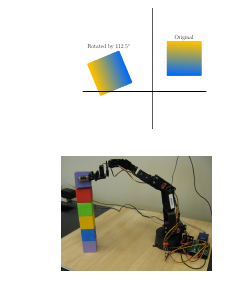
**Fig.14** A rotation rotates objects in a plane about the origin. If the rotation angle is positive, we rotate counterclockwise.

**Fig.15** The robotic arm needs to rotate its joints in order to pick up objects or to place them correctly. Figure taken from (Deisenroth et al., 2015).

Length and angle preservation, as discussed in Section 3.4, are the two characteristics of linear mappings with orthogonal transformation matrices. In the following, we will have a closer look at specific orthogonal transformation matrices, which describe rotations.

A rotation is a linear mapping (more specifically, an automorphism of a Euclidean vector space) that rotates a plane by an angle $ \theta $ about the origin, i.e., the origin is a fixed point. For a positive angle $ \theta > 0 $, by common convention, we rotate in a counterclockwise direction. An example is shown in Figure 3.14, where the transformation matrix is

$$
R = \begin{bmatrix} -0.38 & -0.92 \\ 0.92 & -0.38 \end{bmatrix}. \tag{3.74}
$$

Important application areas of rotations include computer graphics and robotics. For example, in robotics, it is often important to know how to rotate the joints of a robotic arm in order to pick up or place an object, see Fig.15.

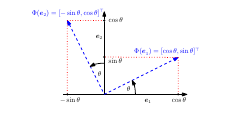
**Fig.16** Rotation of the standard basis in $ \mathbb{R}^2 $ by an angle $ \theta $.

$$
\Phi(e_1) = \begin{bmatrix} \cos \theta \\ \sin \theta \end{bmatrix}, \quad \Phi(e_2) = \begin{bmatrix} -\sin \theta \\ \cos \theta \end{bmatrix}
$$

##  Rotations in $ \mathbb{R}^2 $

Consider the standard basis $ \left\{ e_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, e_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix} \right\} $ of $ \mathbb{R}^2 $, which defines the standard coordinate system in $ \mathbb{R}^2 $. We aim to rotate this coordinate system by an angle $ \theta $ as illustrated in Figure 3.16. Note that the rotated vectors are still linearly independent and, therefore, are a basis of $ \mathbb{R}^2 $. This means that the rotation performs a basis change.

Rotations $ \Phi $ are linear mappings so that we can express them by a rotation matrix $ R(\theta) $. Trigonometry (see Figure 3.16) allows us to determine the coordinates of the rotated axes (the image of $ \Phi $) with respect to the standard basis in $ \mathbb{R}^2 $. We obtain

$$
\Phi(e_1) = \begin{bmatrix} \cos \theta \\ \sin \theta \end{bmatrix}, \quad \Phi(e_2) = \begin{bmatrix} -\sin \theta \\ \cos \theta \end{bmatrix}. \tag{3.75}
$$

Therefore, the rotation matrix that performs the basis change into the rotated coordinates $ R(\theta) $ is given as

$$
R(\theta) = \left[ \Phi(e_1) \ \Phi(e_2) \right] = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix}. \tag{3.76}
$$

##  Rotations in $ \mathbb{R}^3 $

In contrast to the $ \mathbb{R}^2 $ case, in $ \mathbb{R}^3 $ we can rotate any two-dimensional plane about a one-dimensional axis. The easiest way to specify the general rotation matrix is to specify how the images of the standard basis $ e_1, e_2, e_3 $ are supposed to be rotated, and making sure these images $ R e_1, R e_2, R e_3 $ are orthonormal to each other. We can then obtain a general rotation matrix $ R $ by combining the images of the standard basis.

To have a meaningful rotation angle, we have to define what “counterclockwise” means when we operate in more than two dimensions. We use the convention that a “counterclockwise” (planar) rotation about an axis refers to a rotation about an axis when we look at the axis “head on, from the end toward the origin”. In $ \mathbb{R}^3 $, there are therefore three (planar) rotations about the three standard basis vectors (see Figure 3.17):

In [3]:
import math

# --- Matrix-Vector Multiplication ---
def matrix_vector_multiply(A, x):
    """
    Multiply matrix A (n x m) by vector x (m x 1). Returns a vector.
    """
    n = len(A)
    result = [0.0] * n
    for i in range(n):
        result[i] = sum(A[i][j] * x[j] for j in range(len(x)))
    return result

# --- Dot Product ---
def dot_product(x, y):
    """
    Compute the dot product of two vectors: x^T y
    """
    return sum(xi * yi for xi, yi in zip(x, y))

# --- Norm of a Vector ---
def norm(x):
    """
    Compute the Euclidean norm of a vector: ||x|| = sqrt(x^T x)
    """
    return math.sqrt(dot_product(x, x))

# --- Angle Between Vectors ---
def compute_angle(x, y):
    """
    Compute the angle between vectors x and y in radians.
    cos(theta) = <x, y> / (||x|| ||y||)
    """
    cos_theta = dot_product(x, y) / (norm(x) * norm(y))
    # Ensure cos_theta is in [-1, 1] to avoid numerical errors
    cos_theta = max(min(cos_theta, 1.0), -1.0)
    return math.acos(cos_theta)

# --- Rotation Matrix in R^2 (Equation 3.76) ---
def rotation_matrix_2d(theta):
    """
    Construct the rotation matrix R(theta) in R^2 for angle theta (in radians).
    R(theta) = [[cos theta, -sin theta], [sin theta, cos theta]]
    """
    cos_theta = math.cos(theta)
    sin_theta = math.sin(theta)
    return [
        [cos_theta, -sin_theta],
        [sin_theta, cos_theta]
    ]

# --- Rotation Matrix in R^3 (Basic Rotations about Axes) ---
def rotation_matrix_3d(axis, theta):
    """
    Construct a rotation matrix in R^3 for a rotation by angle theta (in radians)
    about the specified axis ('x', 'y', or 'z').
    """
    cos_theta = math.cos(theta)
    sin_theta = math.sin(theta)
    
    if axis == 'x':
        return [
            [1.0, 0.0, 0.0],
            [0.0, cos_theta, -sin_theta],
            [0.0, sin_theta, cos_theta]
        ]
    elif axis == 'y':
        return [
            [cos_theta, 0.0, sin_theta],
            [0.0, 1.0, 0.0],
            [-sin_theta, 0.0, cos_theta]
        ]
    elif axis == 'z':
        return [
            [cos_theta, -sin_theta, 0.0],
            [sin_theta, cos_theta, 0.0],
            [0.0, 0.0, 1.0]
        ]
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'")

# --- Run the Implementation ---
# Section 3.9.1: Rotations in R^2
print("Section 3.9.1: Rotations in R^2")
theta = math.radians(112.5)  # Angle in radians (to match the example in Section 3.9)
R = rotation_matrix_2d(theta)
print(f"Rotation matrix R({112.5}°) (Equation 3.76):")
for row in R:
    print([round(val, 2) for val in row])

# Rotate the standard basis vectors e1 = [1, 0], e2 = [0, 1] (Equation 3.75)
e1 = [1.0, 0.0]
e2 = [0.0, 1.0]
phi_e1 = matrix_vector_multiply(R, e1)
phi_e2 = matrix_vector_multiply(R, e2)
print(f"\nPhi(e1) = {[round(v, 2) for v in phi_e1]} (Equation 3.75)")
print(f"Phi(e2) = {[round(v, 2) for v in phi_e2]} (Equation 3.75)")

# Verify orthogonality and length preservation
print("\nVerification of Orthogonal Transformation:")
# Length preservation
norm_e1 = norm(e1)
norm_phi_e1 = norm(phi_e1)
print(f"Length of e1: {norm_e1:.2f}, Length of Phi(e1): {norm_phi_e1:.2f}")
print(f"Length preserved: {abs(norm_e1 - norm_phi_e1) < 1e-10}")

# Angle preservation (should be 90 degrees between e1 and e2)
angle_before = compute_angle(e1, e2)
angle_after = compute_angle(phi_e1, phi_e2)
print(f"Angle between e1 and e2: {math.degrees(angle_before):.2f}°")
print(f"Angle between Phi(e1) and Phi(e2): {math.degrees(angle_after):.2f}°")
print(f"Angle preserved: {abs(angle_before - angle_after) < 1e-10}\n")

# Section 3.9.2: Rotations in R^3 (Basic Example)
print("Section 3.9.2: Rotations in R^3")
# Rotate a vector around the z-axis by 45 degrees
theta_3d = math.radians(45)
R_z = rotation_matrix_3d('z', theta_3d)
print(f"Rotation matrix R about z-axis (45°):")
for row in R_z:
    print([round(val, 2) for val in row])

# Rotate a vector in R^3
v = [1.0, 0.0, 0.0]  # Standard basis vector e1 in R^3
v_rotated = matrix_vector_multiply(R_z, v)
print(f"\nVector v = {v}")
print(f"Rotated vector = {[round(val, 2) for val in v_rotated]}")

Section 3.9.1: Rotations in R^2
Rotation matrix R(112.5°) (Equation 3.76):
[-0.38, -0.92]
[0.92, -0.38]

Phi(e1) = [-0.38, 0.92] (Equation 3.75)
Phi(e2) = [-0.92, -0.38] (Equation 3.75)

Verification of Orthogonal Transformation:
Length of e1: 1.00, Length of Phi(e1): 1.00
Length preserved: True
Angle between e1 and e2: 90.00°
Angle between Phi(e1) and Phi(e2): 90.00°
Angle preserved: True

Section 3.9.2: Rotations in R^3
Rotation matrix R about z-axis (45°):
[0.71, -0.71, 0.0]
[0.71, 0.71, 0.0]
[0.0, 0.0, 1.0]

Vector v = [1.0, 0.0, 0.0]
Rotated vector = [0.71, 0.71, 0.0]
